In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("mystery_dataset_complex.csv",header=None)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   object 
 1   1       327 non-null    float64
 2   2       789 non-null    object 
 3   3       1000 non-null   object 
 4   4       790 non-null    object 
 5   5       806 non-null    object 
 6   6       672 non-null    object 
 7   7       1000 non-null   object 
 8   8       1000 non-null   object 
 9   9       519 non-null    object 
 10  10      610 non-null    object 
 11  11      1000 non-null   object 
 12  12      346 non-null    object 
 13  13      491 non-null    object 
 14  14      615 non-null    object 
 15  15      1000 non-null   object 
 16  16      593 non-null    object 
 17  17      588 non-null    object 
 18  18      1000 non-null   int64  
 19  19      336 non-null    object 
dtypes: float64(1), int64(1), object(18)
memory usage: 156.4+ KB


In [10]:
data.columns = ["name", "age", "date", "monthly income", "ns1", "ns2", "ns3", "city(made-up)",
               "nationality", "sb", "gender", "phone", "email", "marital status",
               "current employment status", "most recent occupation", "dbms", "visualization tools",
               "experience(in years)", "firm name"]

In [11]:
data.isnull().sum()/data.shape[0]*100

,0
name,0.0
age,67.3
date,21.1
monthly income,0.0
ns1,21.0
ns2,19.4
ns3,32.8
city(made-up),0.0
nationality,0.0
sb,48.1


In [12]:
#remove high cardinality non-useful features that also have a lot of missing data
data.drop(columns=["email","firm name"],inplace=True)


## NS2

In [13]:
data["ns2"] = data["ns2"].astype(str)

data["ns2"] = (
    data["ns2"].
    str.capitalize().
    str[0].
    replace({"Y":"1","N":"0"})
)



##Date

In [14]:
#replace "invalid" with NA
data["date"] = data["date"].replace("invalid",pd.NA)

#convert to datetime
data["date"] = pd.to_datetime(
    data["date"],
    format="mixed",
    dayfirst=True,
    yearfirst=True
)


In [15]:
data['date'].min()

Timestamp('2022-06-02 00:00:00')

In [16]:
data["date"].max()

Timestamp('2025-05-24 00:00:00')

In [17]:
# Extract features from non-missing dates
data['days_since_applying'] = (pd.to_datetime('today') - data['date']).dt.days

In [18]:
data.drop(columns=["date"],inplace=True)

##income

In [19]:
#read the embedded jsons


import json
import re

def extract_value(x):
    if pd.isna(x):
        return None
    try:
        # If it's a dictionary-like string
        if isinstance(x, str) and x.startswith('{'):
            return json.loads(x)['monthly']
        # If it's already a number
        elif isinstance(x, (int, float)):
            return x
        # If it's a string number
        else:
            return float(x)
    except:
        return None

# Apply to your column
data['monthly income'] = data['monthly income'].apply(extract_value)

##ns1

In [20]:
data["ns1"]=data["ns1"].replace({"A":"a","B":"b","C":"c","unknown":np.nan})

##ns3

In [21]:
data["ns3"].value_counts()

,count
ns3,
002,175
abc,172
003,166
001,159


##continent

In [22]:
pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 10.6 MB/s eta 0:00:00


In [23]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

# Apply to your dataframe:
data['continent'] = data['nationality'].apply(country_to_continent)

##checking columns that look okay

In [24]:
columns = [ "gender", "marital status", "current employment status", "dbms", "visualization tools"]

for col in columns:

      print(data[col].value_counts())
      print("\n")


gender
F        216
M        201
Other    193
Name: count, dtype: int64


marital status
single     247
married    244
Name: count, dtype: int64


current employment status
freelancer    231
employed      194
unemployed    190
Name: count, dtype: int64


dbms
SQL       206
Excel     202
Python    185
Name: count, dtype: int64


visualization tools
R          203
PowerBI    195
Tableau    190
Name: count, dtype: int64




## The following columns are perfectly fine, no cleaning is needed


*   age
*   city(made-up)
*   nationality
*   gender,
*   marital status,
*   current employemnt status
*   most recent occupation
*   dbms,
*   visualization tools
*   experience(in years)













In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       1000 non-null   object 
 1   age                        327 non-null    float64
 2   monthly income             1000 non-null   float64
 3   ns1                        681 non-null    object 
 4   ns2                        1000 non-null   object 
 5   ns3                        672 non-null    object 
 6   city(made-up)              1000 non-null   object 
 7   nationality                1000 non-null   object 
 8   sb                         519 non-null    object 
 9   gender                     610 non-null    object 
 10  phone                      1000 non-null   object 
 11  marital status             491 non-null    object 
 12  current employment status  615 non-null    object 
 13  most recent occupation     1000 non-null   object

#EXPLORATORY DATA ANALYSIS

#missing data

In [26]:
#percentage of missing data in each column

data.isna().sum()/1000*100

,0
name,0.0
age,67.3
monthly income,0.0
ns1,31.9
ns2,0.0
ns3,32.8
city(made-up),0.0
nationality,0.0
sb,48.1
gender,39.0


##Should we drop the age column?(since it has almost 70% missing data)

<Axes: xlabel='missing_age', ylabel='monthly income'>

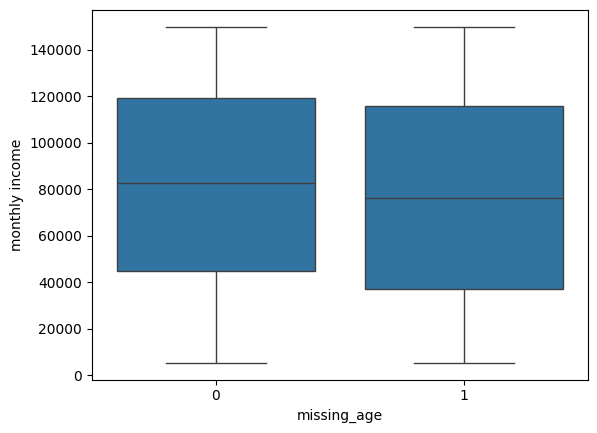

In [27]:
import seaborn as sns

data['missing_age'] = data['age'].isnull().astype(int)
sns.boxplot(x='missing_age', y='monthly income', data=data)


<Axes: xlabel='missing_age', ylabel='experience(in years)'>

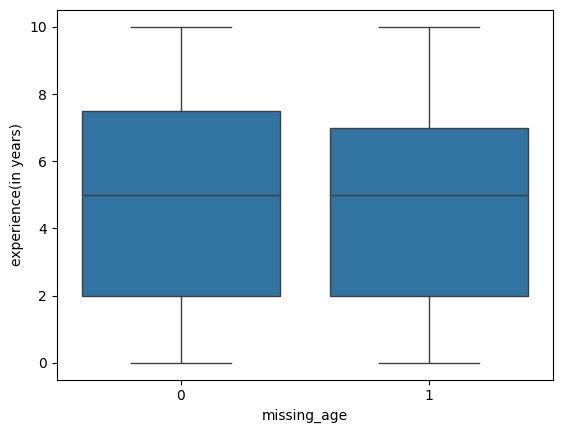

In [28]:
sns.boxplot(x='missing_age', y='experience(in years)', data=data)


In [29]:
data.drop(columns=["missing_age"],inplace=True)

The above plots show that the missingness in the age column doesn't really have a pattern, ie missingness is not correlated with the other features, which is why its safe to drop it.


What we will do is we will check cluster quality with and without the age column and then decide whether to keep it.


We will do the same with the date extracted columns

#Uncovering patterns using EDA


univariate analysis

In [30]:
#numerical columns

data.describe()

,age,monthly income,experience(in years),days_since_applying
count,327.000000,1000.000000,1000.000000,556.000000
mean,42.452599,78321.424000,4.845000,540.233813
std,13.210543,43090.021319,3.068288,318.458725
min,18.000000,5410.000000,0.000000,8.000000
25%,32.000000,40244.500000,2.000000,280.750000
50%,43.000000,77845.500000,5.000000,529.500000
75%,54.000000,116656.000000,7.000000,808.250000
max,65.000000,149919.000000,10.000000,1095.000000


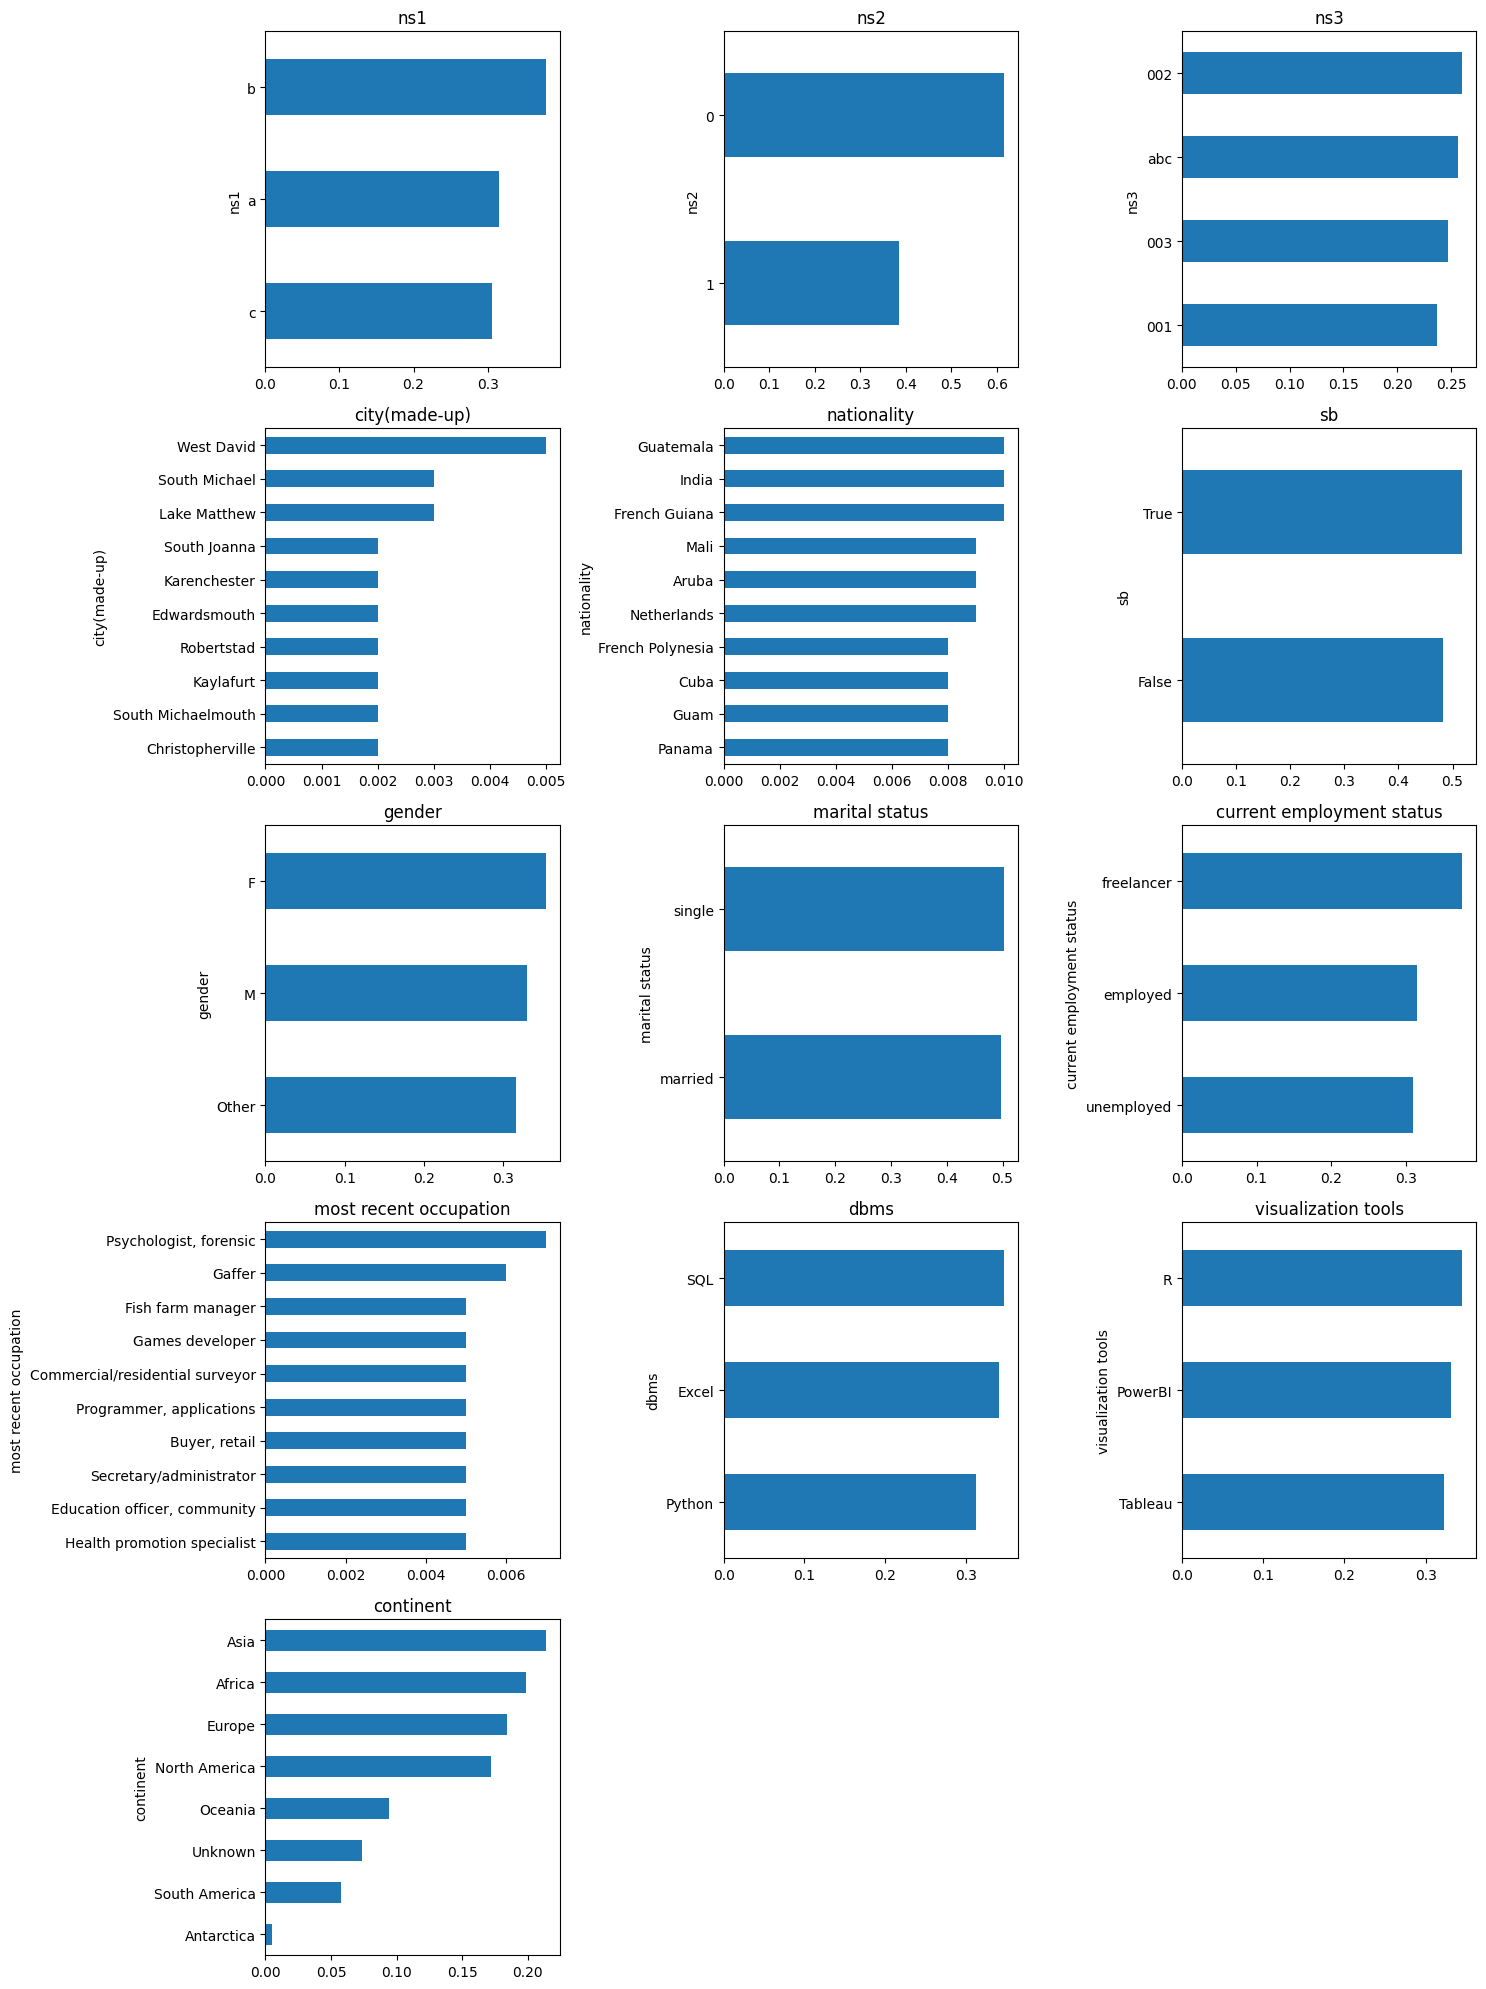

In [31]:
import matplotlib.pyplot as plt

# Select only categorical (object or bool) columns
cat_cols = data.select_dtypes(include=['object', 'bool']).columns
cat_cols = cat_cols.drop(["name","phone"])

# Set up the figure
n_cols = 3
n_rows = -(-len(cat_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Plot value counts for each categorical column
for i, col in enumerate(cat_cols):
    data[col].value_counts(normalize=True).head(10).plot(kind='barh', ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].invert_yaxis()  # So the largest bar is on top

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


sb is a low variance feature

bivariate analysis

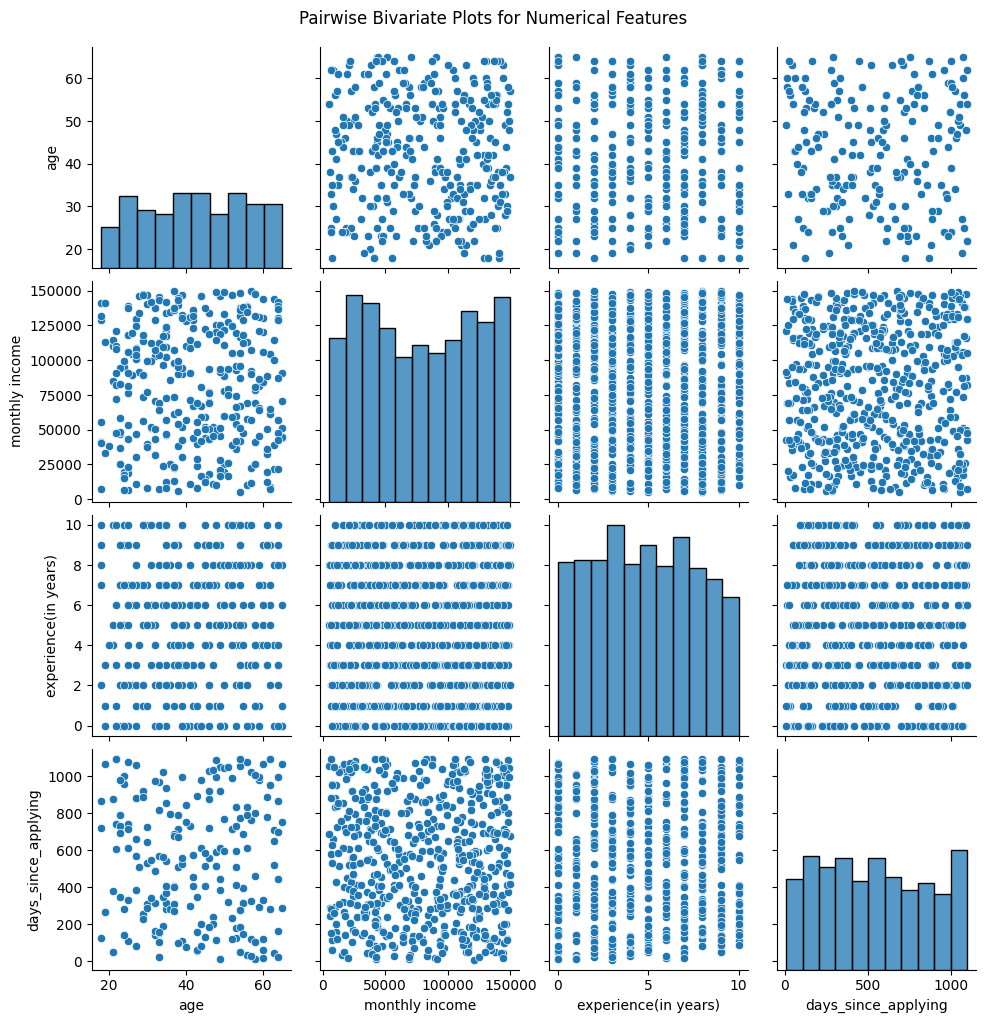

In [32]:
#numerical vs numerical

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot pairplot
sns.pairplot(data[num_cols])
plt.suptitle("Pairwise Bivariate Plots for Numerical Features", y=1.02)

plt.show()


the column "experience in years" provides low clustering value as it is low cardinality and low variance.

(it takes on only 11 discrete values (0–10).)

Low variance and categorical-like features are weak for distance-based clustering.

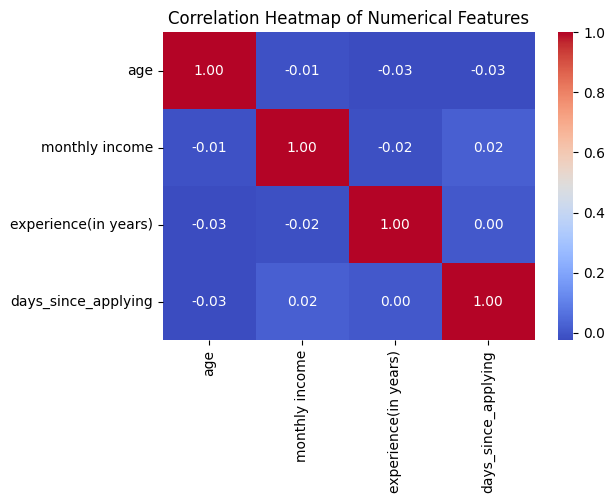

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


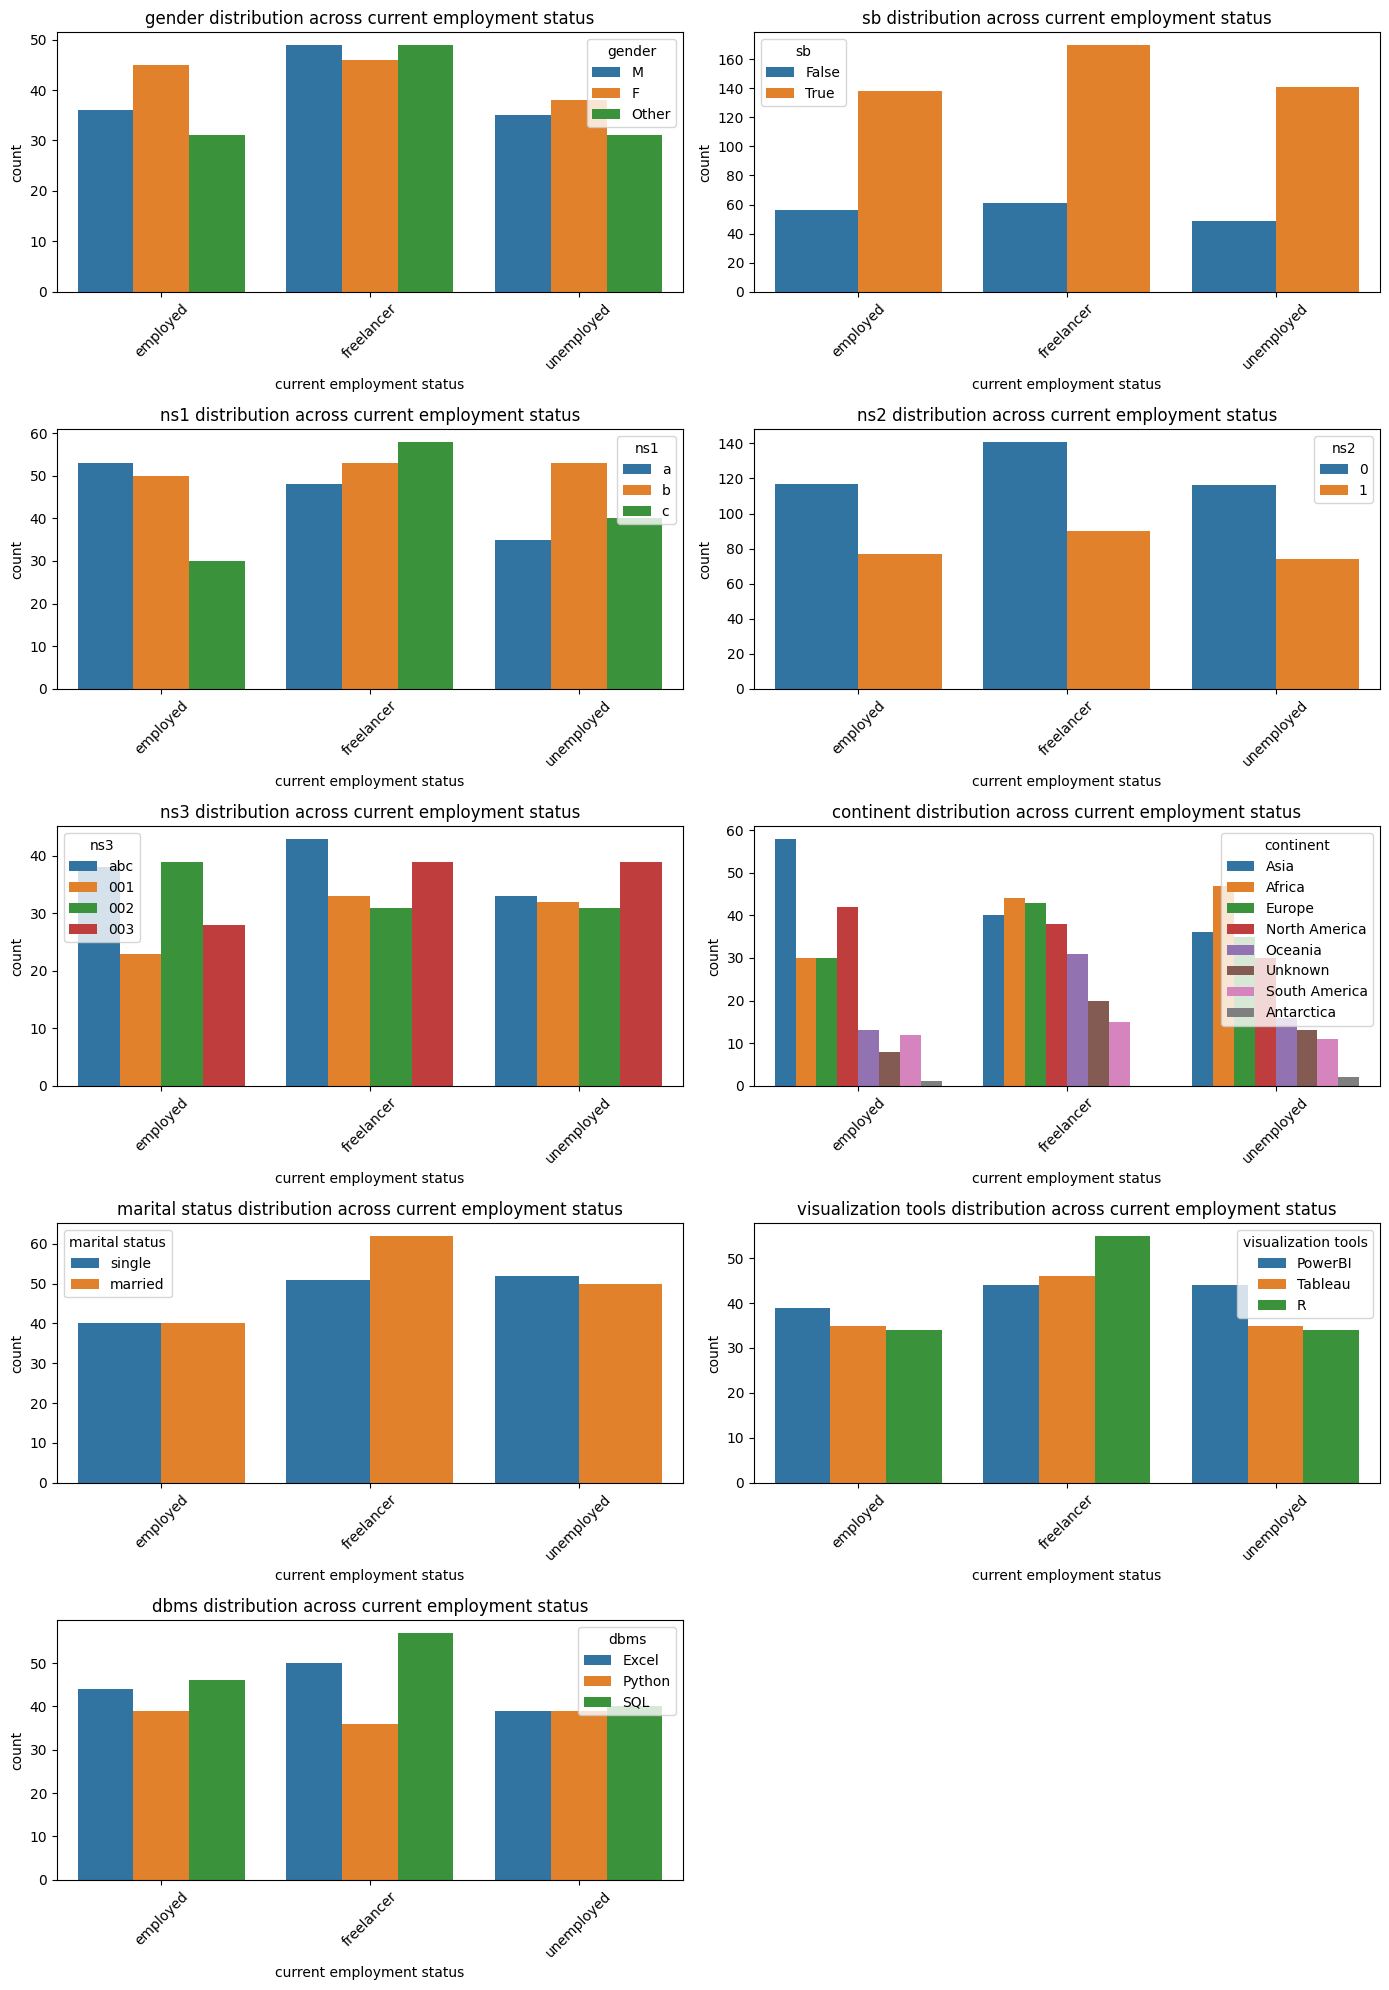

In [ ]:
#categorical vs categorical

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define categorical pairs (you can adjust based on your interest)
cat_pairs = [
    ('current employment status','gender'),
    ('current employment status','sb'),
    ('current employment status','ns1'),
    ('current employment status','ns2'),
    ('current employment status','ns3'),
    ('current employment status','continent'),
    ('current employment status','marital status'),
    ('current employment status', 'visualization tools'),
    ('current employment status', 'dbms')
]

# Set up the figure
n_cols = 2
n_rows = -(-len(cat_pairs) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Plot each pair
for i, (x_col, hue_col) in enumerate(cat_pairs):
    sns.countplot(data=data, x=x_col, hue=hue_col, ax=axes[i])
    axes[i].set_title(f"{hue_col} distribution across {x_col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes if any
for j in range(len(cat_pairs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
#employed ppl are more likely to be from team a in

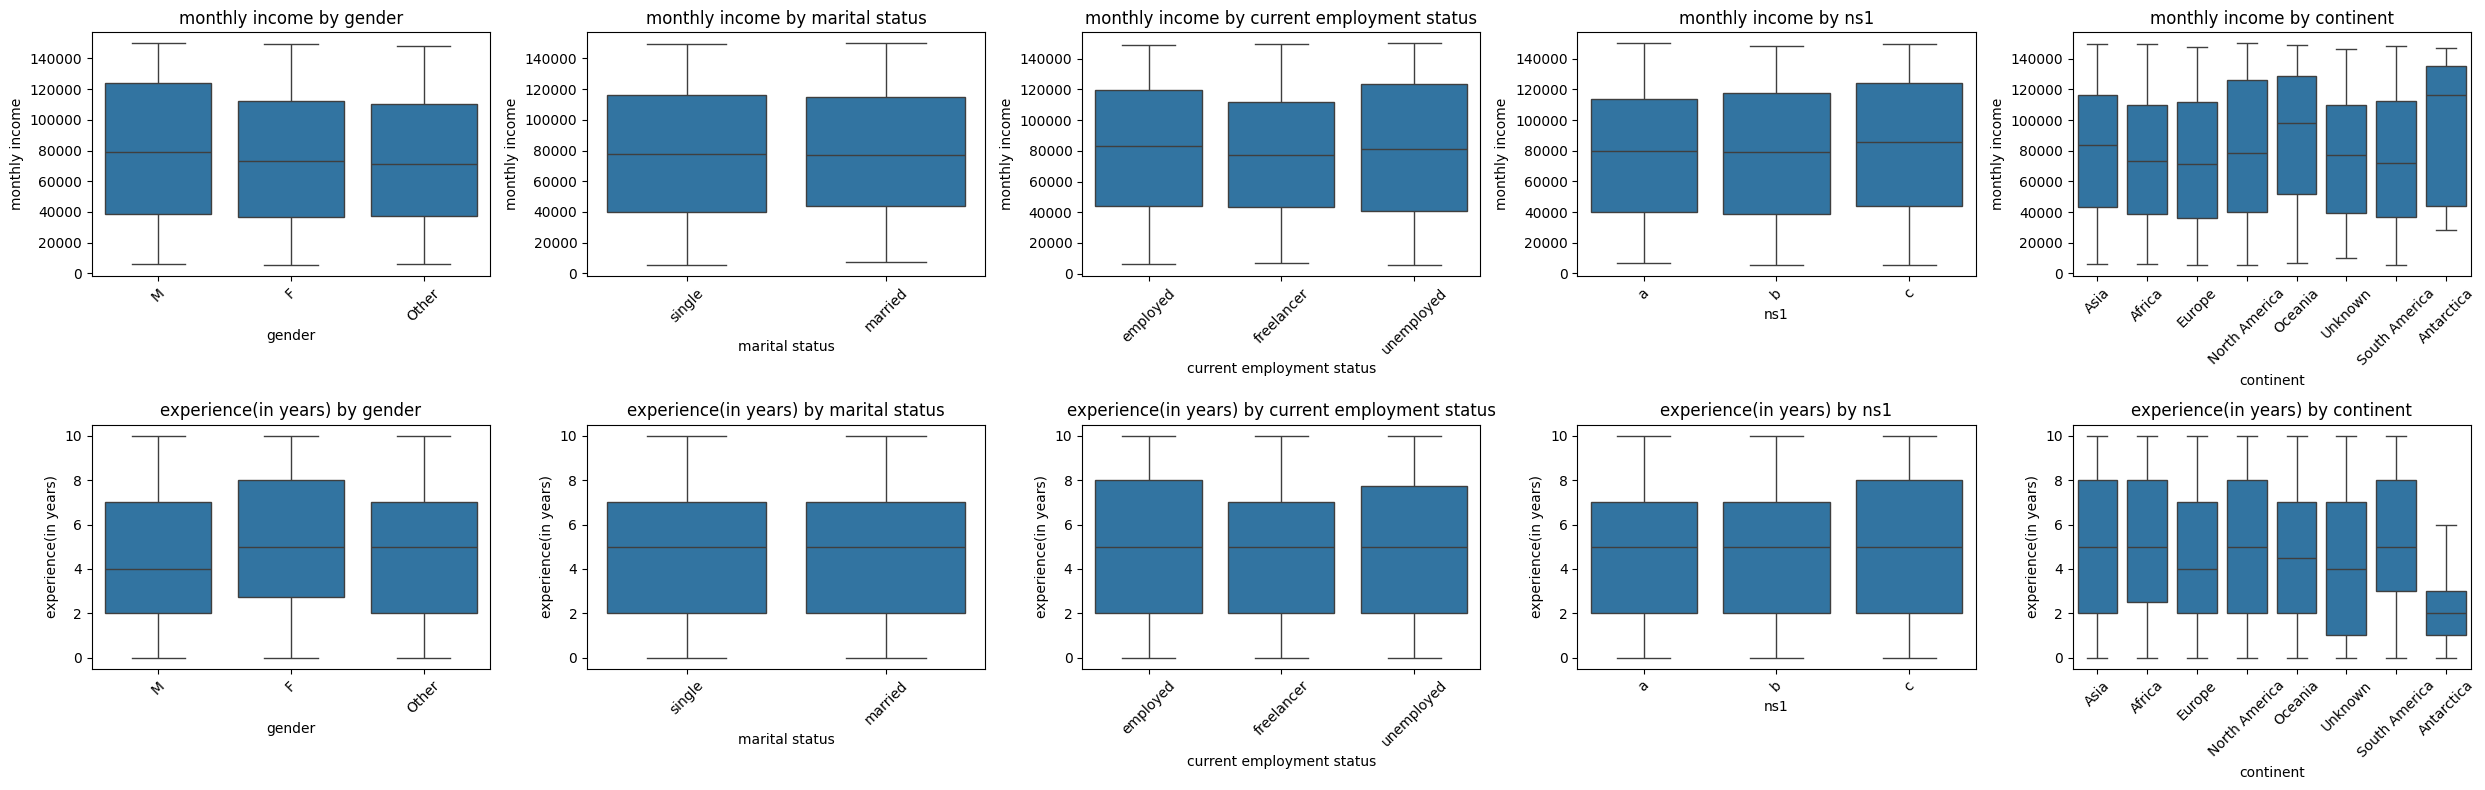

In [ ]:
#numerical vs categorical

import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical columns
num_cols = ['monthly income', 'experience(in years)']
cat_cols = ['gender', 'marital status', 'current employment status',"ns1","continent"]

# Set up subplots grid
n_rows = len(num_cols)
n_cols = len(cat_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes if n_rows > 1 else [axes]  # flatten if only one row

# Loop over numerical vs categorical combinations
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i][j] if n_rows > 1 else axes[j]
        sns.boxplot(data=data, x=cat, y=num, ax=ax)
        ax.set_title(f"{num} by {cat}")
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


who tends to have more skills?

In [ ]:
cols = ["dbms","visualization tools"]
data[cols]= data[cols].fillna("missing")

In [ ]:
data['has_dbms'] = data['dbms'] != 'missing'
data['has_viz'] = data['visualization tools'] != 'missing'
data['num_skills'] = data[['has_dbms', 'has_viz']].sum(axis=1)

In [ ]:
data["num_skills"].value_counts()

,count
num_skills,
1,467
2,357
0,176


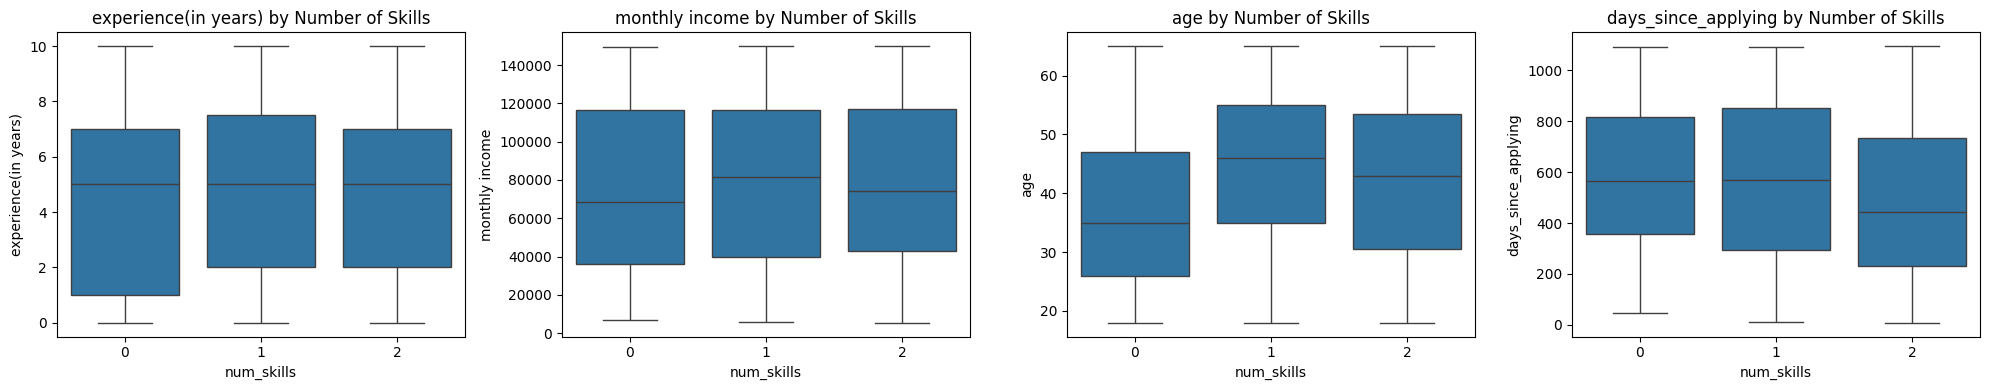

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['experience(in years)', 'monthly income', 'age', 'days_since_applying']
fig, axes = plt.subplots(1, len(num_cols), figsize=(5 * len(num_cols), 4))

for i, col in enumerate(num_cols):
    sns.boxplot(data=data, x='num_skills', y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Number of Skills")
plt.tight_layout()
plt.show()


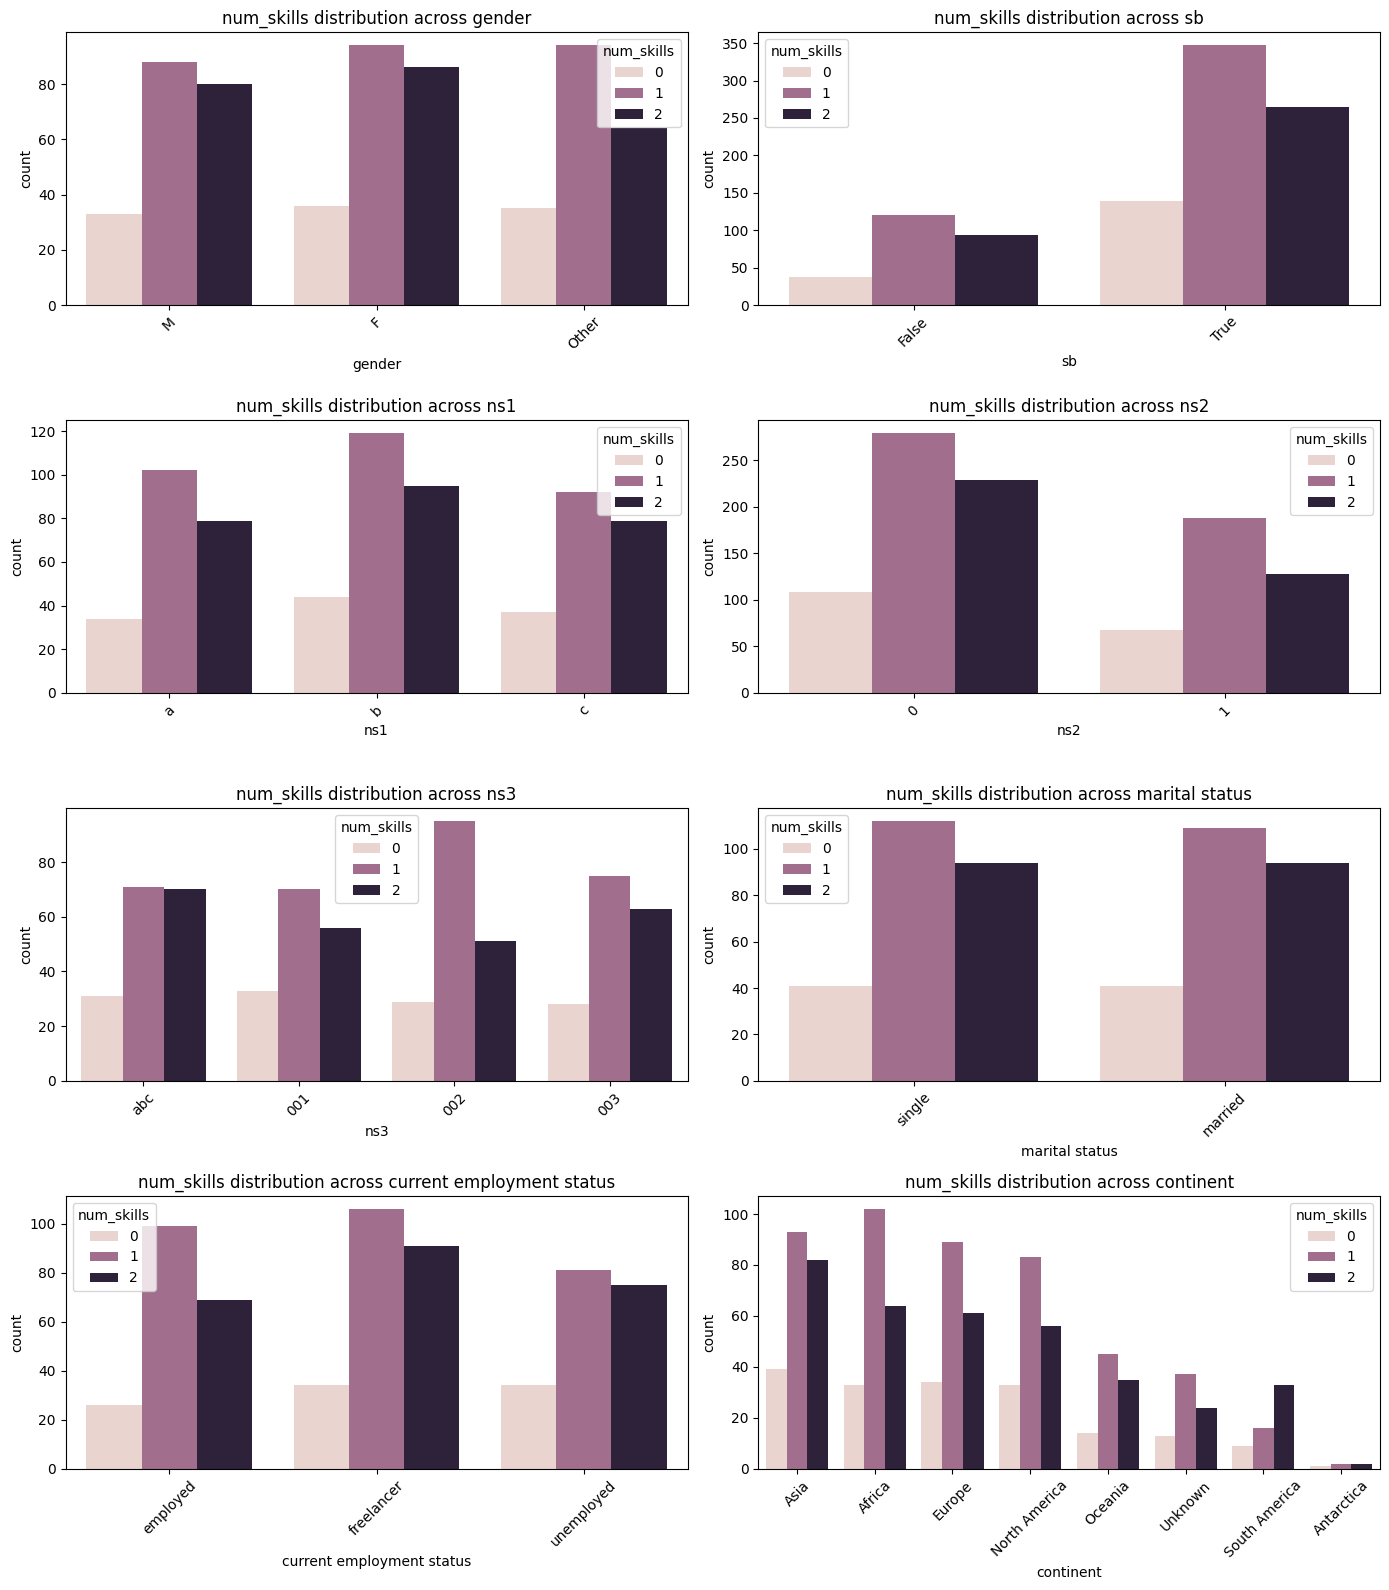

In [ ]:
# Define categorical pairs (you can adjust based on your interest)
cat_pairs = [
    ('gender', 'num_skills'),
    ('sb', 'num_skills'),
    ('ns1', 'num_skills'),
    ('ns2', 'num_skills'),
    ('ns3', 'num_skills'),
    ('marital status', 'num_skills'),
    ('current employment status', 'num_skills'),
    ('continent', 'num_skills')
]


# Set up the figure
n_cols = 2
n_rows = -(-len(cat_pairs) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()

# Plot each pair
for i, (x_col, hue_col) in enumerate(cat_pairs):
    sns.countplot(data=data, x=x_col, hue=hue_col, ax=axes[i])
    axes[i].set_title(f"{hue_col} distribution across {x_col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes if any
for j in range(len(cat_pairs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
#which viz tool is most pop among employed people/freelancers
pd.crosstab(data['current employment status'], data['visualization tools'], normalize='index')

visualization tools,PowerBI,R,Tableau,missing
current employment status,,,,
employed,0.201031,0.175258,0.180412,0.443299
freelancer,0.190476,0.238095,0.199134,0.372294
unemployed,0.231579,0.178947,0.184211,0.405263


In [ ]:
#which dbms tool is most pop among employed people/freelancers
pd.crosstab(data['current employment status'], data['dbms'], normalize='index')

dbms,Excel,Python,SQL,missing
current employment status,,,,
employed,0.226804,0.201031,0.237113,0.335052
freelancer,0.216450,0.155844,0.246753,0.380952
unemployed,0.205263,0.205263,0.210526,0.378947


In [ ]:
#which dbms tool is most pop among women
pd.crosstab(data['gender'], data['dbms'], normalize='index')

dbms,Excel,Python,SQL,missing
gender,,,,
F,0.245370,0.203704,0.180556,0.370370
M,0.199005,0.189055,0.218905,0.393035
Other,0.170984,0.186528,0.217617,0.424870


In [ ]:
#which viz tool is most pop among women
pd.crosstab(data['gender'], data['visualization tools'], normalize='index')

visualization tools,PowerBI,R,Tableau,missing
gender,,,,
F,0.231481,0.180556,0.189815,0.398148
M,0.233831,0.199005,0.194030,0.373134
Other,0.165803,0.212435,0.196891,0.424870


which tool is popular among experienced people

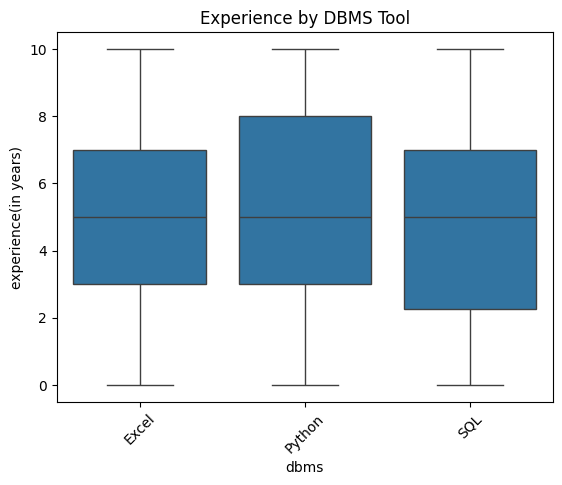

In [35]:
sns.boxplot(data=data, x='dbms', y='experience(in years)')
plt.title("Experience by DBMS Tool")
plt.xticks(rotation=45)
plt.show()


#Imputing missing values

1.   age , application_year , days_since_applying :	KNN IMPUTATION
2.   ns1 , ns3 , gender , marital status , current employment status , dbms , visualization tools	: Add a "missing" category.

In [ ]:
cols= ["ns1","ns3","gender","marital status","current employment status"]

# Replace NaNs in the selected object columns with "missing"
data[cols] = data[cols].fillna("missing")

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


knn_cols = ["age","days_since_applying"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[knn_cols])


imputer = KNNImputer(n_neighbors=5)
imputed_scaled_data = imputer.fit_transform(scaled_data)


imputed_data = scaler.inverse_transform(imputed_scaled_data)
data[knn_cols] = imputed_data

In [ ]:
data.drop(columns=["has_dbms","has_viz"],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       1000 non-null   object 
 1   age                        1000 non-null   float64
 2   monthly income             1000 non-null   float64
 3   ns1                        1000 non-null   object 
 4   ns2                        1000 non-null   object 
 5   ns3                        1000 non-null   object 
 6   city(made-up)              1000 non-null   object 
 7   nationality                1000 non-null   object 
 8   sb                         1000 non-null   bool   
 9   gender                     1000 non-null   object 
 10  phone                      1000 non-null   object 
 11  marital status             1000 non-null   object 
 12  current employment status  1000 non-null   object 
 13  most recent occupation     1000 non-null   object

##ns in ns1 , ns2 , ns3 stands for "not sure". sb stands for "some boolean". we tried to figure out what information these columns might be representing but then we gave up.

In [ ]:
data.to_csv('cleaned_dataset.csv',index=False)